## Insurance analysis:
- Here we'll be analyzing the data set on insurance charges which is available on kaggle. Source: 
- We'll be performing various task on this data set such as:
    1. Basic data exploration to understand the data
    2. Data cleaning (checking for null/missing values, checking for outliers, checking for data consistency)
    3. Perform EDA and built assumptions/hypothesis
    4. Test hypothesis using statistical testing methods to find are the hypothesis actually true or by chance 

In [2]:
# Importing required packages

import warnings 
from math import inf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# loading the dataset as datafram from csv file
insurance = pd.read_csv(r'C:\Users\golla\Downloads\insurance.csv')

### Data exploration
- Here we'll be understanding basic structure of data, we'll be exploring datatypes of each column and perform necessary modification if needed

In [5]:
# print first few row to get an idea about the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# using shape attribute to get an idea about structure of the data
insurance.shape

(1338, 7)

Data set consist of 1338 records and 7 attributes/variables, each record reprenting information about each person who is insured 

In [7]:
# To check the presence of any missing values and data types of each column
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above results, we observe that there are no missing values present in the dataset, also data types seems to be in proper format. There are 1338 rows and 7 columns available in the dataset 

### Checking for duplicates and handling them

In [8]:
# For checking the presence of duplicate values in the data set
insurance.duplicated().sum() 

1

We can see that there is 1 entry indicating duplicate record, since there are 7 features indicating record about a person. It's highly unlikely for it to be valid entry wherein two people are having same features. It's safe to drop one of this duplicate record for carrying out further analysis

In [9]:
insurance.drop_duplicates(inplace=True)
insurance.shape

(1337, 7)

In [10]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


From the summary statistics table we get a general idea about measure of center and measure of spread.

Observations:
1. People who take out their insurance generally range in the `age` from 18-64 with a median as well as mean of 39 and standard deviation of 14.05. The data is normally distributed since there is not much differnce in mean and average
2. The `bmi` ranges from ~(16-53), these means that the people with all sorts of shape and structure and a wide range of physical personality are present in the dataset. The mean and median are quite close enough indicating that the dataset around this variable is also normally distributed and is not skewed, but still we need to check for presence of outliers.
3. Number of `childrens`: For the people applying for insurance the number of children they have ranges from 0-5, and on average people have 1 child
4. `charges`: This variable is our variable of interest. We'll be getting insights on how charges are related to other variable, what all factors are responsible for high charges of insurance. Just by looking at the summary we can get an idea that certain group of people have relatively higher charges(this include outliers) than than normal. We'll try to understand the possible reasons for this

Considering it to be a sample, we can also calculate standrad error of the sampling distribution for charges variable using formula: std dev/sqrt(sample size)

In [11]:
std_err = insurance.charges.std()/np.sqrt(insurance.shape[0])
print(f'Standard Error for the sample data set is {std_err:.2f}')

Standard Error for the sample data set is 331.20


**Calculating Confidence interval for Insurance charges**

Before, going ahead with calculating confidence interval we need to first verify wheather the data is normally distributed

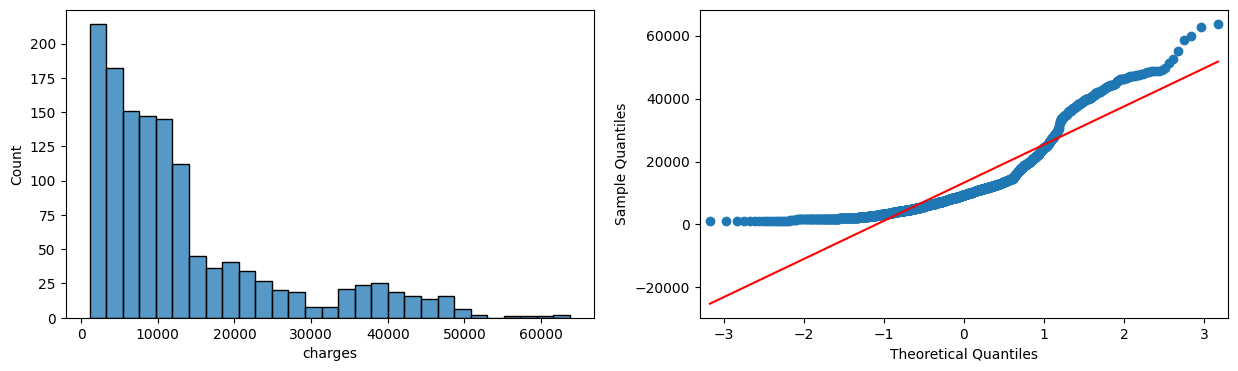

In [13]:
# checking the distribution of insurance charges
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.histplot(data=insurance, x='charges',ax=ax[0])
sm.qqplot(insurance['charges'], line='s', ax=ax[1])
plt.show()

From the plots we can observe that the data is not normally distributed, still we'll go ahead and calculate the confidence interval for insurance charges with confidence level of 95%. This will help us get an estimated mean value for the population of the provided sample

In [14]:
# calculating confidence interval
confidence_level = 0.95
charges_mean = insurance.charges.mean()
degrees_of_freedom = insurance.shape[0]-1
t_score = stats.t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)
margin_of_error = t_score * std_err
lower_bound = charges_mean - margin_of_error
upper_bound = charges_mean + margin_of_error
print(f'Confidence Interval: ({lower_bound},{upper_bound})')

Confidence Interval: (12629.391284827156,13928.85168848474)


In [15]:
# method 2: For calculating confidence interval(generally if sample size is big enough(>30) we calculate CI using this function) 
stats.norm.interval(confidence_level, loc=charges_mean, scale=std_err)

(12629.979906266457, 13928.263067045438)

Based on the current sample we can say that if we select a random sample of same sampple size using same method everytime then the average value of insurance charges varies from each other with a standard error of 331.20$ (when we choose random sample from population, everytime there will be some variations in the dataset which leads us to this standard error)

Also, based on the sample provided to us, we can be 95% confident that the constructed inteval captures the actual mean of the population data

**Checking for outliers in `bmi` and `charges`**

In [15]:
# checking for presence of outliers in bmi

twenty_fifth_bmi = insurance.bmi.quantile(0.25)
seventy_fifth_bmi = insurance.bmi.quantile(0.75)

iqr_bmi = seventy_fifth_bmi - twenty_fifth_bmi

lower_limit_bmi = twenty_fifth_bmi - 1.5*iqr_bmi
upper_limit_bmi = seventy_fifth_bmi + 1.5*iqr_bmi
print(f'lower limit: {lower_limit_bmi}, upper limit: {upper_limit_bmi}')

bmi_outliers = insurance[(insurance.bmi<lower_limit_bmi) | (insurance.bmi>upper_limit_bmi)]
print(f'Number of outliers in bmi: {bmi_outliers.shape[0]}')
print()
print('Summary table for data set without outliers in bmi')
display(insurance[(insurance.bmi>=lower_limit_bmi) & (insurance.bmi<=upper_limit_bmi)].describe())

outliers_bmi = insurance[(insurance.bmi<lower_limit_bmi) | (insurance.bmi>upper_limit_bmi)]

lower limit: 13.674999999999994, upper limit: 47.31500000000001
Number of outliers in bmi: 9

Summary table for data set without outliers in bmi


,age,bmi,children,charges
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810
std,14.042170,5.922176,1.208008,11997.547468
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4744.325050
50%,39.000000,30.300000,1.000000,9369.615750
75%,51.000000,34.488750,2.000000,16604.302645
max,64.000000,46.750000,5.000000,62592.873090


We can observe that there are 9 values which represent outliers in bmi of people, but these outliers are not affecting our variable of interest i.e `charges` to quantifiable amount.

In [16]:
# checking for outliers in charges
twenty_fifth_charges = insurance.charges.quantile(0.25)
seventy_fifth_charges = insurance.charges.quantile(0.75)

iqr_charges = seventy_fifth_charges - twenty_fifth_charges

lower_limit_charges = twenty_fifth_charges - 1.5*iqr_charges
upper_limit_charges = seventy_fifth_charges + 1.5*iqr_charges

print(f'lower and upper limit for outliers in charges: {lower_limit_charges}, {upper_limit_charges}')
outliers_charges = insurance[(insurance.charges<lower_limit_charges) | (insurance.charges>upper_limit_charges)].shape[0]

lower and upper limit for outliers in charges: -13120.716174999998, 34524.777625


We observe that there are about 139 values in charges that are extreme value in insurance charges that people are bound to pay. These values accounts for **~10%** of the total values in charges. Further analysis has to be done to check out what are the possible reasons for these extreme values

### Feature Engineering:
##### Here we'll create some helper features to aid us in analysis
- `smoker` column/attribute is present as categorical data we'll create a numerical data out of it, 'yes' will be represented by 1 and 'no' will be presented as 0
- `age` is present as integers, will be create a categorical variable out of it
    - ages between 18-25: young adults, 25-40: adults, 40-60: middle age adults, 60+: old adults
- `bmi` is also present as continous numerical variable, we'll be extracting a new category out of it
    - bmi between 0-18.5 underweight, 18.5-25 healthy weight, 25-30 overweight, 30-40 obesity, 40+ type c obesity

In [18]:
# creating a boolean column for smoker as 'smoker_bool'
insurance['smoker_bool'] = insurance['smoker']
insurance['smoker_bool'] = (insurance['smoker_bool']=='yes').astype('int')

# creating categorical column for bmi as 'bmi_category'
labels_bmi = ['underweight', 'healthy weight', 'overweight', 'obesity', 'obesity type 3']
bins_bmi = [0, 18.5, 25, 30, 40, inf]
insurance['bmi_category'] = pd.cut(insurance['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

# creating categorical column for age categories
labels_age = ['young adult', 'adult', 'middleage adult', 'old adult']
bins_age = [insurance.age.min(), 25, 40, 60, insurance.age.max()]
insurance['age_category'] = pd.cut(insurance.age, bins=bins_age, labels=labels_age, right=True, include_lowest=True)

# printing first few rows for checking newly created categories
insurance.head()

,age,sex,bmi,children,smoker,region,charges,smoker_bool,bmi_category,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,1,overweight,young adult
1,18,male,33.770,1,no,southeast,1725.55230,0,obesity,young adult
2,28,male,33.000,3,no,southeast,4449.46200,0,obesity,adult
3,33,male,22.705,0,no,northwest,21984.47061,0,healthy weight,adult
4,32,male,28.880,0,no,northwest,3866.85520,0,overweight,adult


## Necessary visuals to display relationship between different variables

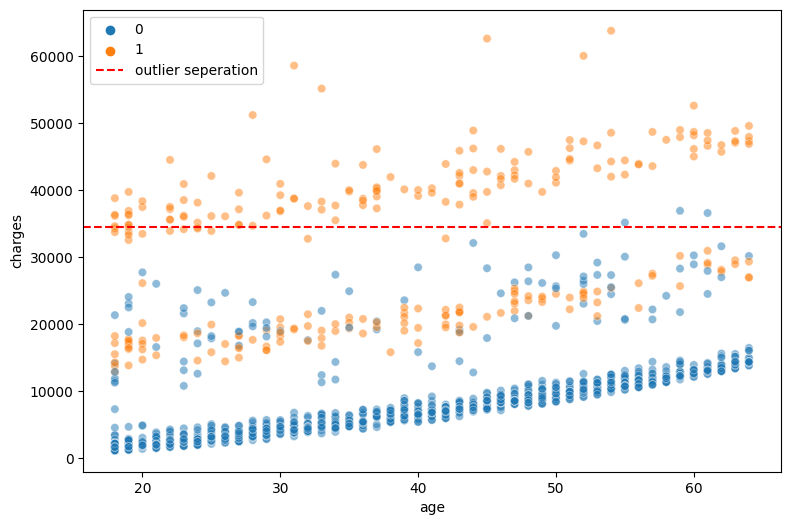

In [19]:
# checking relationship between age and charges
plt.figure(figsize=(9,6))
ax = sns.scatterplot(data=insurance, x='age', y='charges', hue='smoker_bool', alpha=0.5)
ax.axhline(upper_limit_charges, color='red', ls='--', label='outlier seperation')
plt.legend()
plt.show()

We observe that three group to be present in above visual:

For each group a slight incline is observed towards right as age increases. This means that as age increases charges also goes up a bit
* Group A: In this group charges range between **~1000-14000\$**. One thing to noteworthy is that none of the people in these group are seen to be smoking
* Group B: In this group charges range from **~11,000-35,000\$**. Some people in this group are observe to be smokers and some are observed to be non-smoker (from the visual itself it looks like a 50-50 split). Few values(4 people) are observed to be charged slightly higher than the outlier seperation line and they are observed to be greater tah  the age of around 55 years.
* Group C: This group charges typically ranges between **~32,000-62,000\$**. All the people from these group are marked as **smokers** in our visual. Almost all the values for this group are observed to be extreme value except for the few young individuals. Some people are charged way above 50,000\$, there might be other factors that are responsible for such high insurance charges

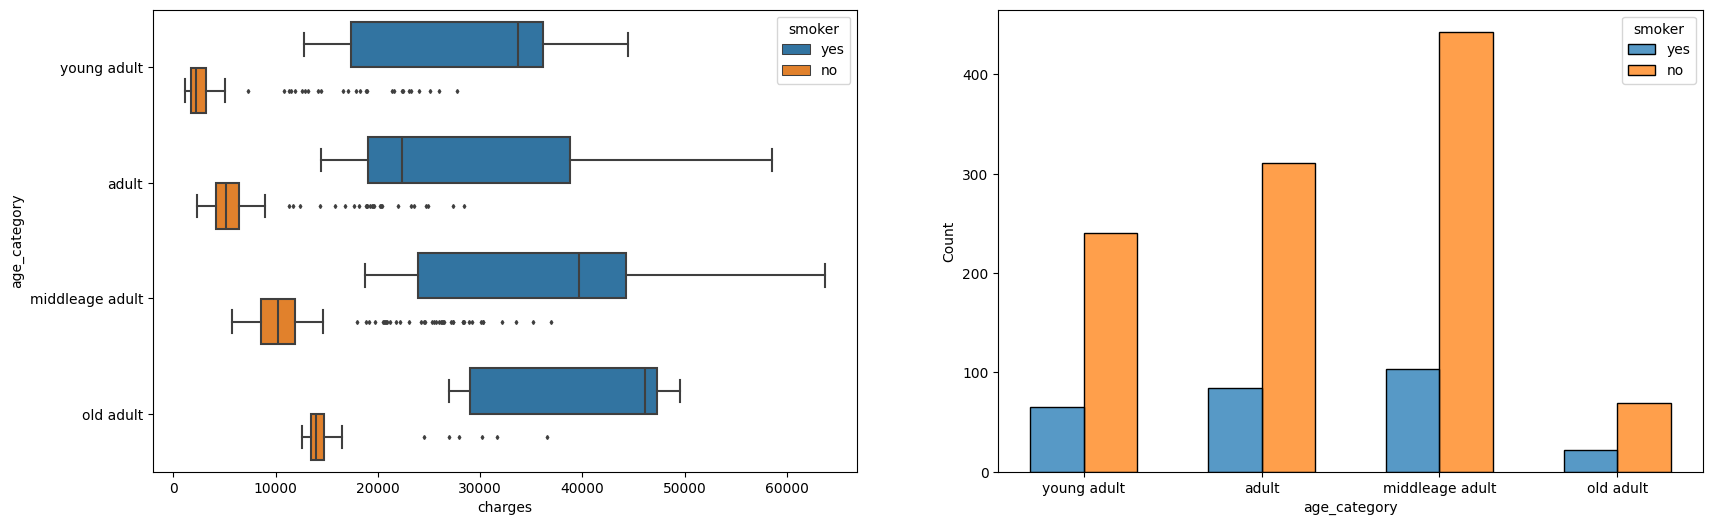

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.boxplot(data=insurance, y='age_category', x='charges', hue='smoker', orient='h', fliersize=2, ax=ax[0])
sns.histplot(data=insurance, x='age_category', hue='smoker',multiple='dodge', shrink=0.6, ax=ax[1])
plt.show()

Observations from boxplot:
* A general trend we observe is that for smokers the charges imposed on them were substancially higher that than the non-smokers. Also linear increase can be observed in charges with increase in age, both for smoker and non-smoker group
* IQR(Inter quartile range) for all the smokers are almost the same. One thing that can be observe is that for smokers adult category, median is closed to 1st quartile which mean that there are more number of people who are imposed lower charges contrary to other categories where median is closed to 3rd quartile indicating that there are more people who are imposed higher charges in those categories.

Observations from histogram plot:
* For each category there are quantifiably more non-smokers than smokers.
* From the distribution we see that major number of poeple are in the category of middleage adult(40-60 yrs old), followed by adult(25-40), then young adult(18-25), and lastly old adult(60+). This pattern is smae for smokers as well as non-smokers.

**Visualizing relationship between bmi and charges**

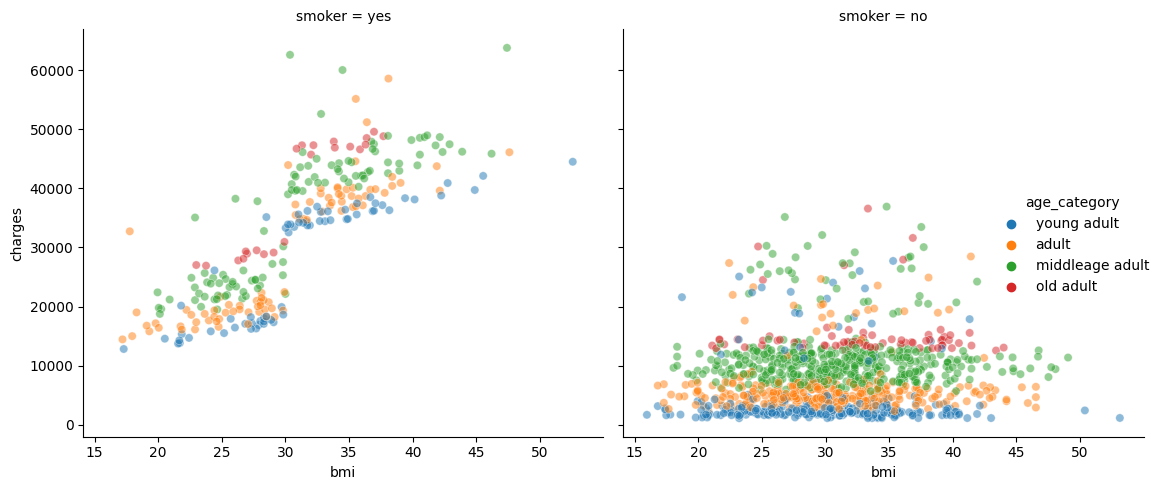

In [21]:
# plt.figure(figsize=(14,8))
ax = sns.relplot(data=insurance, x='bmi', y='charges', kind='scatter', col='smoker', hue='age_category', alpha=0.5)
# ax.set_suptitle('Relation between BMI and insurance charges based on')
plt.tight_layout()
plt.show()

From the above plots we can observe that:
* For Non-smoker: It's observed that graph is rather uniform with increase in `BMI` not resulting in any increase in `charges`. Observed rise in charges are rather the result of increase in age. Majority of the datapoints are found to follow this pattern, except for few where charges are above ~16,000\$. Above this random scattering of datapoints is observed without any pattern
* For Smoker: For this group of people it's observed that there is linear relationship between `charges` and `BMI`, and it's not dependent on 'age'.

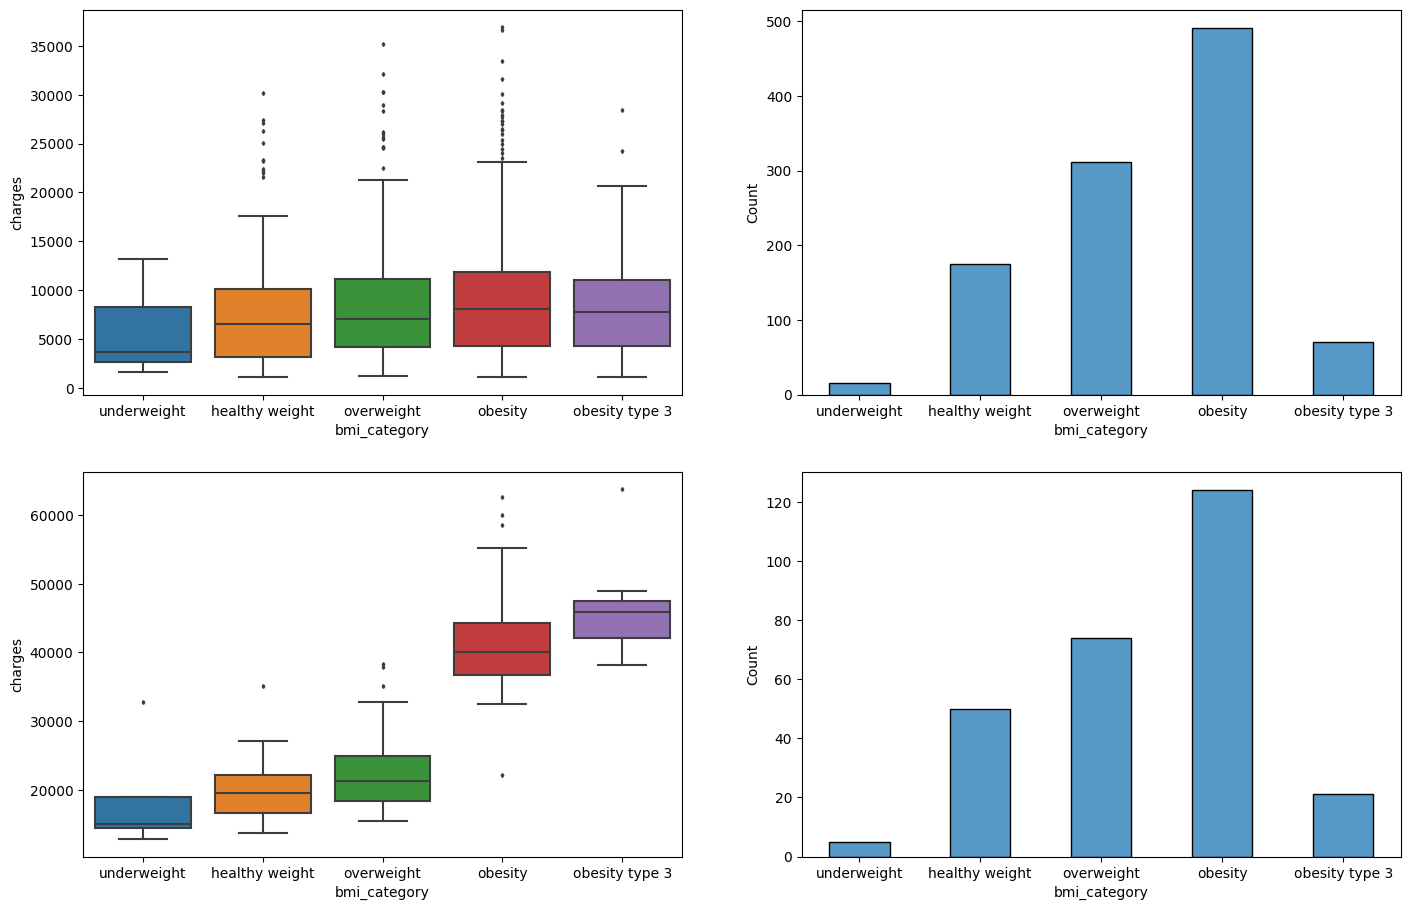

In [22]:
# visuals for relation between bmi_category and charges
insurance_smoker = insurance[insurance.smoker=='yes']
insurance_non_smoker = insurance[insurance.smoker=='no']
fig, ax = plt.subplots(2,2,figsize=(17,11))
sns.boxplot(data=insurance_non_smoker, x='bmi_category', y='charges', fliersize=2, ax=ax[0][0])
sns.histplot(data=insurance_non_smoker, x='bmi_category', shrink=0.5, ax=ax[0][1])
sns.boxplot(data=insurance_smoker, x='bmi_category', y='charges', fliersize=2, ax=ax[1][0])
sns.histplot(data=insurance_smoker, x='bmi_category', shrink=0.5, ax=ax[1][1])
plt.show()

* In the above diagram the top two graphs represents insurance charges distribution for `non-smokers` and the `bmi_category`:
    * we observe that the median charges for each category is relatively same ranging between **~6500-8000\$** (except for underweight category where the charges are below **\$5,000**, also the IQR is also relatively narrower), minor fluctuations present may be due to outliers present in them. Higher end whisker tend to show some linear growth in them as category goes from underweight to obesity and then again drop slightly for osesity type 3 people.
    * When we have a look at the distribution of categories, we observe that most recuuring people are obese(\~490 people), follwoed by overweight(\~310 people), healthy weight(\~170 people), obese type 3(\~70 people), and then lastly underweight people(\~15 people). 
* The bottom two graphs represent insurance charges distribution for `smoker` and bmi_category:
    * we observe that if people are smokers and obese(both obese as well as obese type 3) they are charged way higher than rest of the categories. median charges for underweight people  are **~15,000\$**, for healthy-weight people it's **~20,000\$**, and for overweight it's **~21,000$**, where as median charges for obese category is **~40,000\$** and for obese type 3 it's **45,000\$**
    * Distribution pattern for bmi-category is same as that of non-smoker, with obese type being significant higher than rest of them, followed by over-weight, healthy, obese type3, and lastly underweight

In [23]:
# tablular format to see the fluctuations in smoker/Non smoker mean charges w.r.t. bmi categories
display(insurance_non_smoker.groupby('bmi_category').agg({'charges':['mean', 'median']}))
display(insurance_smoker.groupby('bmi_category').agg({'charges':['mean', 'median']}))

charges             
                       mean       median
bmi_category                            
underweight     5532.992453  3732.625100
healthy weight  7685.656014  6593.508300
overweight      8257.961955  7063.915700
obesity         8951.887130  8116.680000
obesity type 3  8179.664367  7727.467125

charges             
                        mean       median
bmi_category                             
underweight     18809.824980  15006.57945
healthy weight  19942.223641  19479.90370
overweight      22495.874163  21215.43300
obesity         40895.846917  39993.37910
obesity type 3  45467.786146  45863.20500

We will perform an ANOVA test to confirm the differences in charges as per the category later 

**Relation between Gender/sex and charges**

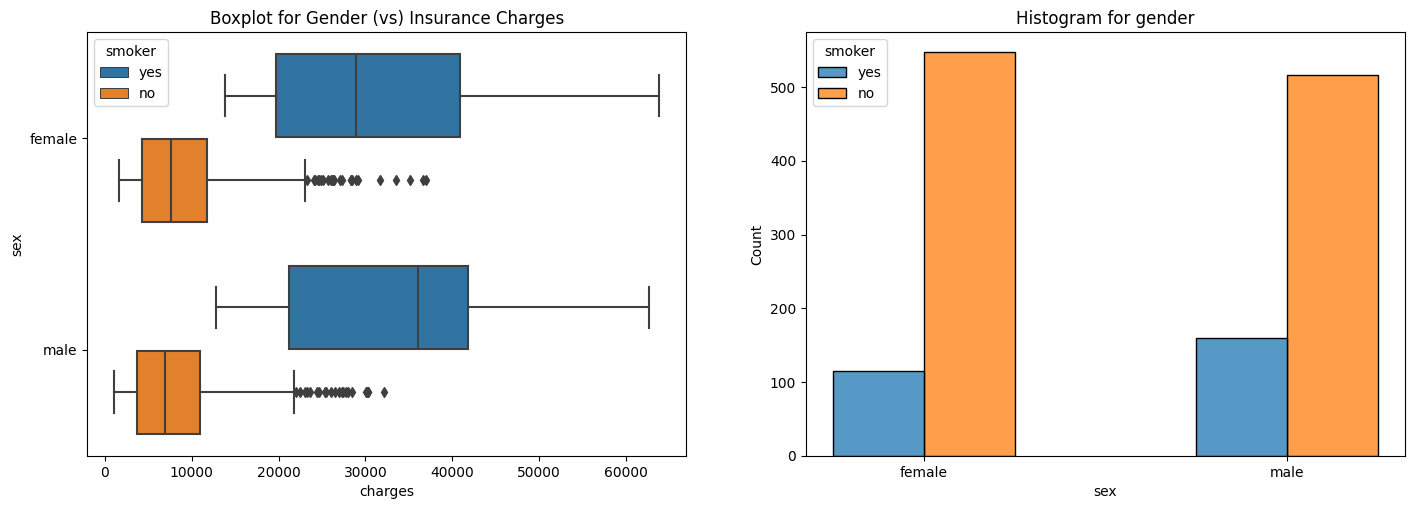

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(17,5.5))
sns.boxplot(data=insurance, y='sex', x='charges', hue='smoker', orient='h', ax=ax[0])
ax[0].set_title('Boxplot for Gender (vs) Insurance Charges')
sns.histplot(data=insurance, x='sex', hue='smoker', multiple='dodge', shrink=0.5, ax=ax[1])
ax[1].set_title('Histogram for gender')
plt.show()

Observations from boxplot:
* for `non-smokers` charges are relatively lower for both male and female gender, higher extreme/outlier charges can be observed for female than males
* for smokers, one observation noteworthy is that median for females is slightly closer to 1st quartile, which implies that for female smokers generally there are more insurance charges which are on the higher end then on lower end(left skewed data). Whereas, contrary to this for male smokers median is more closer to 3rd quartile, which implies data is right skewed or more of lower charges are present than higher charges.

Observation frm histogram:
* there are more of female non-smokers(\~550) than male non-smokers(\~500), and there are more of male smokers(\~150) than female smokers(\~110)


In [32]:
insurance_smoker.groupby('sex').agg({'charges':['mean', 'median']})

charges            
                mean      median
sex                             
female  30678.996276  28950.4692
male    33042.005975  36085.2190

To understand the skweness in data, from above table :
* we see that for females, median\<mean i.e. data is left skewed (more values in the upper half of the dataset)
* for male, median>mean i.e. data is right skewed (more values in the lower half of the dataset)

**Exploring relationship between charges and regions** 

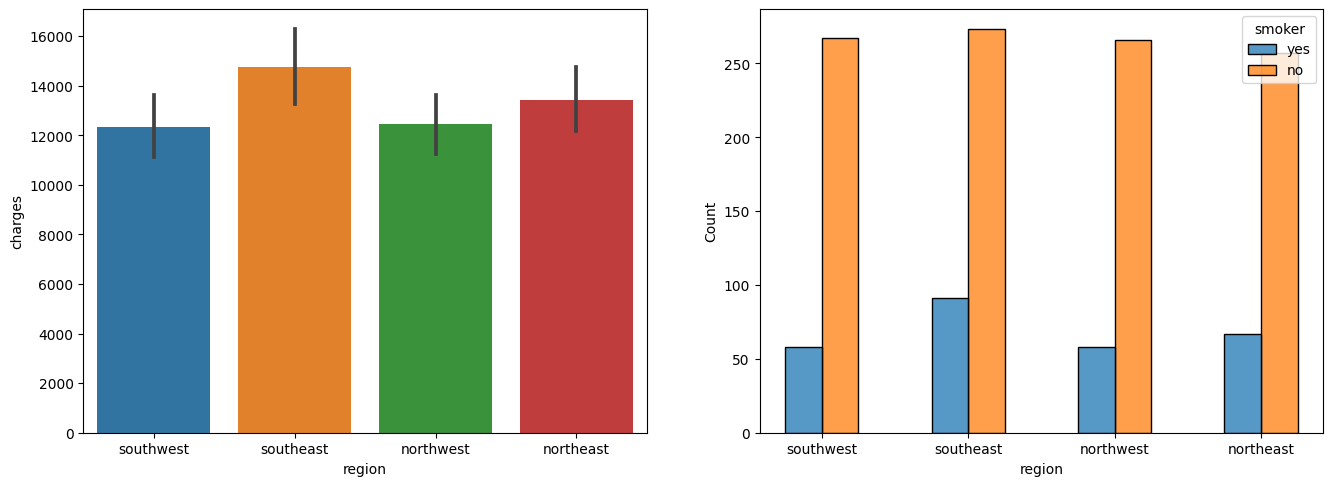

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5.5))
sns.barplot(data=insurance, x='region', y='charges', estimator='mean', ax=ax[0])
sns.histplot(data=insurance, x='region', hue='smoker', multiple='dodge', shrink=0.5, ax=ax[1])
plt.show()

* Upon observing the barplot and histogram plot side by side, one trend we observe is that average charges in each regions closely follows the distribution of smokers in each region, so we can say that charges is underlying chracteristics of smokers in each region.
* distribution of non-smokers can be observed to be more or less same in each region.
* highest insurance charges are in the region of southeast(**\~14700\$**), followed by northeast(**\~13400\$**), and then southwest and northwest which are very close to each other(**~12300\$**) 

## Performing Hypothesis testing
We built a hypotheis that people how smoke are charges way nore than people who don't smoke. We can test whether it's purely by chance or there is statistical evidence to it.

- Ho = there is no difference in charges for people who smoke and people who don't
- Ha = there is a difference in charges for people who smoke and people who don't
- we choose a significance level of 5% i.e 0.05 to test this hypothesis

carrying out test

In [27]:
insurance_smoker = insurance[insurance.smoker=='yes']
insurance_non_smoker = insurance[insurance.smoker=='no']
alpha = 0.05
display(stats.ttest_ind(a=insurance_smoker['charges'], b=insurance_non_smoker['charges'], equal_var=False))
p_value = stats.ttest_ind(a=insurance_smoker['charges'], b=insurance_non_smoker['charges'], equal_var=False)[1]
if p_value<=alpha:
    print('Reject null hypothesis')
    print('There is a significant difference in average charges for people who smoke and people who don\'t smoke')
else:
    print('Failed to reject null hypothesis')
    print('There is no significant difference in average charges for people who smoke and people who don\'t smoke')

TtestResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103, df=311.87741711542276)

Reject null hypothesis
There is a significant difference in average charges for people who smoke and people who don't smoke
